In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Read data

In [2]:
df = pd.read_csv('vars_308.csv')

In [3]:
df.head()

,record,fraud_label,dow_risk,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,...,ssn_homephone_count_0_by_3,ssn_homephone_count_0_by_7,ssn_homephone_count_0_by_14,ssn_homephone_count_0_by_30,ssn_homephone_count_1_by_3,ssn_homephone_count_1_by_7,ssn_homephone_count_1_by_14,ssn_homephone_count_1_by_30,ssn_name_count_0_by_3,ssn_name_count_0_by_7
0,1,0,0.014499,365.0,1,1,1,1,1,1,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0
1,2,1,0.014499,365.0,1,1,1,1,1,1,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0
2,3,0,0.014499,365.0,1,1,1,1,1,1,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0
3,4,0,0.014499,365.0,1,1,1,1,1,1,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0
4,5,0,0.014499,365.0,1,1,1,1,1,1,...,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0


In [4]:
df.columns

Index(['record', 'fraud_label', 'dow_risk', 'ssn_day_since', 'ssn_count_0',
       'ssn_count_1', 'ssn_count_3', 'ssn_count_7', 'ssn_count_14',
       'ssn_count_30',
       ...
       'ssn_homephone_count_0_by_3', 'ssn_homephone_count_0_by_7',
       'ssn_homephone_count_0_by_14', 'ssn_homephone_count_0_by_30',
       'ssn_homephone_count_1_by_3', 'ssn_homephone_count_1_by_7',
       'ssn_homephone_count_1_by_14', 'ssn_homephone_count_1_by_30',
       'ssn_name_count_0_by_3', 'ssn_name_count_0_by_7'],
      dtype='object', length=311)

In [5]:
y = df['fraud_label']

### KS Score

In [6]:
df_f = df[y==1]
df_nf = df[y==0]

In [7]:
ks_stat = {}
for col in df.columns:
    ks = ks_2samp(df_f[col], df_nf[col])
    print(f'KS for {col}: {ks.statistic:.3f}, with p: {ks.pvalue:.3f}')
    ks_stat[col] = ks

KS for record: 0.022, with p: 0.000
KS for fraud_label: 1.000, with p: 0.000
KS for dow_risk: 0.016, with p: 0.001
KS for ssn_day_since: 0.229, with p: 0.000
KS for ssn_count_0: 0.111, with p: 0.000
KS for ssn_count_1: 0.153, with p: 0.000
KS for ssn_count_3: 0.176, with p: 0.000
KS for ssn_count_7: 0.197, with p: 0.000
KS for ssn_count_14: 0.217, with p: 0.000
KS for ssn_count_30: 0.228, with p: 0.000
KS for address_day_since: 0.324, with p: 0.000
KS for address_count_0: 0.179, with p: 0.000
KS for address_count_1: 0.240, with p: 0.000
KS for address_count_3: 0.270, with p: 0.000
KS for address_count_7: 0.293, with p: 0.000
KS for address_count_14: 0.312, with p: 0.000
KS for address_count_30: 0.323, with p: 0.000
KS for dob_day_since: 0.162, with p: 0.000
KS for dob_count_0: 0.106, with p: 0.000
KS for dob_count_1: 0.146, with p: 0.000
KS for dob_count_3: 0.160, with p: 0.000
KS for dob_count_7: 0.164, with p: 0.000
KS for dob_count_14: 0.173, with p: 0.000
KS for dob_count_30: 0.179

KS for address_count_0_by_14: 0.274, with p: 0.000
KS for address_count_0_by_30: 0.285, with p: 0.000
KS for address_count_1_by_3: 0.135, with p: 0.000
KS for address_count_1_by_7: 0.181, with p: 0.000
KS for address_count_1_by_14: 0.205, with p: 0.000
KS for address_count_1_by_30: 0.213, with p: 0.000
KS for dob_count_0_by_3: 0.142, with p: 0.000
KS for dob_count_0_by_7: 0.145, with p: 0.000
KS for dob_count_0_by_14: 0.136, with p: 0.000
KS for dob_count_0_by_30: 0.111, with p: 0.000
KS for dob_count_1_by_3: 0.094, with p: 0.000
KS for dob_count_1_by_7: 0.117, with p: 0.000
KS for dob_count_1_by_14: 0.118, with p: 0.000
KS for dob_count_1_by_30: 0.100, with p: 0.000
KS for homephone_count_0_by_3: 0.140, with p: 0.000
KS for homephone_count_0_by_7: 0.121, with p: 0.000
KS for homephone_count_0_by_14: 0.092, with p: 0.000
KS for homephone_count_0_by_30: 0.068, with p: 0.000
KS for homephone_count_1_by_3: 0.098, with p: 0.000
KS for homephone_count_1_by_7: 0.103, with p: 0.000
KS for hom

In [8]:
sorted_ks_stat = sorted(ks_stat.items(), key=lambda x:x[1].statistic, reverse=True)
ks_rank = [[k[0], i] for i, k in enumerate(sorted_ks_stat)]

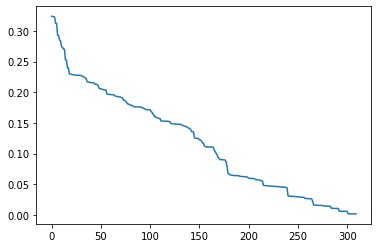

In [9]:
plt.figure()
ks_plot = np.asarray([[i, k[1].statistic] for i, k in enumerate(sorted_ks_stat[1:])])
plt.plot(ks_plot[:, 0], ks_plot[:, 1])
plt.show()

In [10]:
with open('ks_stat.csv', 'w') as f:
    f.write('\n'.join([f'{i[0]},{i[1].statistic},{i[1].pvalue}' for i in sorted_ks_stat]))

### FDR

In [11]:
fdr = dict()
cutoff = int(0.03 * len(df))
num_fraud = len(y[y==1])
for col in df.columns:
    feature = df[col].sort_values(ascending=True)
    ascend = y[y.index.isin(feature[:cutoff].index)]
    fdr_a = len(ascend[ascend==1]) / num_fraud

    descend = y[y.index.isin(feature[-cutoff:].index)]
    fdr_d = len(descend[descend==1]) / num_fraud
    fdr[col] = max(fdr_a, fdr_d)
    print(f'{col}: {fdr[col]}')

record: 0.0296671993330091
fraud_label: 1.0
dow_risk: 0.031195720141735567
ssn_day_since: 0.25526297505731954
ssn_count_0: 0.13624678663239073
ssn_count_1: 0.17619676231501424
ssn_count_3: 0.1994024873202251
ssn_count_7: 0.21948169248940458
ssn_count_14: 0.24122837490446744
ssn_count_30: 0.25463767109011326
address_day_since: 0.345167789897867
address_count_0: 0.20301535468630585
address_count_1: 0.26172444938511774
address_count_3: 0.2906273883137636
address_count_7: 0.31459737372333774
address_count_14: 0.3355797957340374
address_count_30: 0.34468144236781767
dob_day_since: 0.11720975474188841
dob_count_0: 0.1286736608073369
dob_count_1: 0.15285208087264643
dob_count_3: 0.17334815535329673
dob_count_7: 0.17626624053359272
dob_count_14: 0.17341763357187523
dob_count_30: 0.171194330577364
homephone_day_since: 0.10032654762731884
homephone_count_0: 0.15111512540818453
homephone_count_1: 0.19127353574654346
homephone_count_3: 0.20232057250052107
homephone_count_7: 0.20364065865351214
hom

fulladdress_count_1_by_14: 0.2290696866532342
fulladdress_count_1_by_30: 0.22781907871882165
name_dob_count_0_by_3: 0.1725838949489335
name_dob_count_0_by_7: 0.19704022788855693
name_dob_count_0_by_14: 0.21774473702494268
name_dob_count_0_by_30: 0.23212672827068714
name_dob_count_1_by_3: 0.11672340721183909
name_dob_count_1_by_7: 0.15125408184534148
name_dob_count_1_by_14: 0.17557145834780796
name_dob_count_1_by_30: 0.1846036267630098
name_fulladdress_count_0_by_3: 0.04439658167164594
name_fulladdress_count_0_by_7: 0.05926492044743973
name_fulladdress_count_0_by_14: 0.07663447509205865
name_fulladdress_count_0_by_30: 0.08386020982422011
name_fulladdress_count_1_by_3: 0.040992148961300635
name_fulladdress_count_1_by_7: 0.056694226360036126
name_fulladdress_count_1_by_14: 0.07538386715764608
name_fulladdress_count_1_by_30: 0.08399916626137706
name_homephone_count_0_by_3: 0.04391023414159661
name_homephone_count_0_by_7: 0.05863961648023345
name_homephone_count_0_by_14: 0.07628708399916626

In [12]:
sorted_fdr = sorted(fdr.items(), key=lambda x: x[1], reverse=True)
fdr_rank = [[f[0], i] for i, f in enumerate(sorted_fdr)]

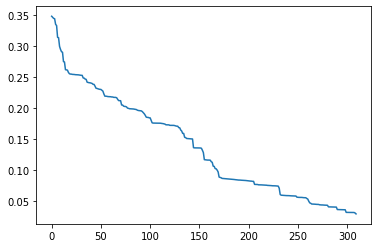

In [13]:
plt.figure()
fdr_plot = np.asarray([[i, k[1]] for i, k in enumerate(sorted_fdr[1:])])
plt.plot(fdr_plot[:, 0], fdr_plot[:, 1])
plt.show()

In [14]:
with open('fdr_score.csv', 'w') as f:
    f.write('\n'.join([f'{col},{f}' for col, f in sorted_fdr]))

### Combined Results

In [15]:
ks_rank.sort(key=lambda x: x[0])
fdr_rank.sort(key=lambda x: x[0])

In [16]:
total_rank = [[ks[0], (ks[1]+fdr[1])/2] for ks, fdr in zip(ks_rank, fdr_rank)]
total_rank.sort(key=lambda x: x[1])

In [17]:
with open('filter_rank.csv', 'w') as f:
    f.write('\n'.join([col for col, _ in total_rank]))